# Check data

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_id = test['PassengerId']
test.drop(['PassengerId'], axis=1, inplace=True)
train.drop(['PassengerId'], axis=1, inplace=True)

In [2]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


# Process data

In [6]:
def loss_rate(x):  # x is DataFrmae type
    table = ((x.isnull().sum())/x.shape[0]).sort_values(ascending=False).map(lambda i:"{:.2%}".format(i))
    return table

In [7]:
loss_rate(train)

Cabin       77.10%
Age         19.87%
Embarked     0.22%
Survived     0.00%
Pclass       0.00%
Name         0.00%
Sex          0.00%
SibSp        0.00%
Parch        0.00%
Ticket       0.00%
Fare         0.00%
dtype: object

In [8]:
loss_rate(test)

Cabin       78.23%
Age         20.57%
Fare         0.24%
Pclass       0.00%
Name         0.00%
Sex          0.00%
SibSp        0.00%
Parch        0.00%
Ticket       0.00%
Embarked     0.00%
dtype: object

## Cabin

Process Cabin first. The Cabin data is far more less then other data, but I think that Cabin is still related to thier survival. Cause the Cabin types may related to thier economy condition and so on.

I decide to drop the specific room number, only remain the cabin type.

In [9]:
train.Cabin.value_counts()
# there are many multiple rooms info

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [10]:
ls = []
for i in train.Cabin:
    if i is np.nan:  # remain nan
        ls.append(np.nan)
    elif len(i.split()) > 1:  # remain mutiple rooms info, waiting further process
        ls.append(i)
    else:
        ls.append(i[:1])

In [11]:
train.Cabin = ls

In [12]:
train.Cabin.value_counts()

C                  51
B                  36
D                  32
E                  32
A                  15
F                   9
G                   4
C23 C25 C27         4
B96 B98             4
C22 C26             3
B51 B53 B55         2
B57 B59 B63 B66     2
B58 B60             2
F G73               2
F E69               1
T                   1
D10 D12             1
F G63               1
C62 C64             1
B82 B84             1
Name: Cabin, dtype: int64

Multiple rooms are in same type cabin, so I will merge them, "C23 C25 C27" to "C".  

There are some special info such as "F G73" and "T", I think that is special cabin for crews or captain or some kinds of people. In test.csv, Cabin categories contain "ABCDEFG" and "F E", "F G", without "T", so we need to merge all data but "T"(delete).  

As for NaN data, turn it to U('Unknow').

In [13]:
ls = []
for i in train.Cabin:
    if i is np.nan:  # remain nan
        ls.append('U')
    elif i[:3] in ["F E", "F G"]:
        ls.append(i[:3].replace(' ',''))  # remove blank
    else:
        ls.append(i[:1])

In [14]:
train.Cabin = ls
train.drop(train[train.Cabin == 'T'].index, inplace=True)  # delete "T"
train.Cabin.value_counts()

U     687
C      59
B      47
D      33
E      32
A      15
F       9
G       4
FG      3
FE      1
Name: Cabin, dtype: int64

All right!

In [15]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


In [16]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.340458,-0.076094,-0.035760,0.081248,0.257456
Pclass,-0.340458,1.000000,-0.367893,0.082370,0.017636,-0.550143
Age,-0.076094,-0.367893,1.000000,-0.307737,-0.188552,0.096119
SibSp,-0.035760,0.082370,-0.307737,1.000000,0.414690,0.159707
Parch,0.081248,0.017636,-0.188552,0.414690,1.000000,0.216288
Fare,0.257456,-0.550143,0.096119,0.159707,0.216288,1.000000


In [17]:
train.reset_index(inplace=True, drop=True)

In [18]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S
886,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
887,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,U,S
888,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


## Ticket

I don't think that ticket related to thier survival, so I just delete this atrribute.

In [19]:
train.drop(['Ticket'], axis=1, inplace=True)

## Name

I don't think that name related to survival.

In [20]:
train.drop(['Name'], axis=1, inplace=True)

In [21]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,U,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,U,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,U,S


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    int64  
 1   Pclass    890 non-null    int64  
 2   Sex       890 non-null    object 
 3   Age       713 non-null    float64
 4   SibSp     890 non-null    int64  
 5   Parch     890 non-null    int64  
 6   Fare      890 non-null    float64
 7   Cabin     890 non-null    object 
 8   Embarked  888 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


## Age

<AxesSubplot:>

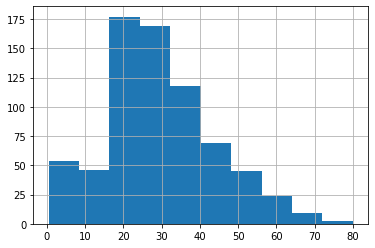

In [23]:
train.Age.hist()

In [24]:
train.Age.describe()

count    713.000000
mean      29.677658
std       14.525365
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

I think the missing values should be filled with the average.

In [25]:
train.Age.fillna(train.Age.mean(), inplace=True)

In [26]:
train.Age.describe()

count    890.000000
mean      29.677658
std       12.999186
min        0.420000
25%       22.000000
50%       29.677658
75%       35.000000
max       80.000000
Name: Age, dtype: float64

## Embarked

In [27]:
train.Embarked.value_counts()

S    643
C    168
Q     77
Name: Embarked, dtype: int64

It has no special value. I will not process this attribute, cause one-hot encoder will group them together.

## Standardization

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    int64  
 1   Pclass    890 non-null    int64  
 2   Sex       890 non-null    object 
 3   Age       890 non-null    float64
 4   SibSp     890 non-null    int64  
 5   Parch     890 non-null    int64  
 6   Fare      890 non-null    float64
 7   Cabin     890 non-null    object 
 8   Embarked  888 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [29]:
attrs_cat = ['Survived', 'Sex', 'Cabin', 'Embarked']
x_cat = train[attrs_cat]

In [30]:
from sklearn.preprocessing import StandardScaler
attrs_num = ['Pclass', 'Age', 'SibSp' ,'Parch', 'Fare']
scl = StandardScaler()
x_num = pd.DataFrame(scl.fit_transform(train[attrs_num]), columns=attrs_num)

In [31]:
x = pd.concat([x_cat, x_num], axis=1)

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    int64  
 1   Sex       890 non-null    object 
 2   Cabin     890 non-null    object 
 3   Embarked  888 non-null    object 
 4   Pclass    890 non-null    float64
 5   Age       890 non-null    float64
 6   SibSp     890 non-null    float64
 7   Parch     890 non-null    float64
 8   Fare      890 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 62.7+ KB


## One-hot encoding

In [33]:
pd.get_dummies(x).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    890 non-null    int64  
 1   Pclass      890 non-null    float64
 2   Age         890 non-null    float64
 3   SibSp       890 non-null    float64
 4   Parch       890 non-null    float64
 5   Fare        890 non-null    float64
 6   Sex_female  890 non-null    uint8  
 7   Sex_male    890 non-null    uint8  
 8   Cabin_A     890 non-null    uint8  
 9   Cabin_B     890 non-null    uint8  
 10  Cabin_C     890 non-null    uint8  
 11  Cabin_D     890 non-null    uint8  
 12  Cabin_E     890 non-null    uint8  
 13  Cabin_F     890 non-null    uint8  
 14  Cabin_FE    890 non-null    uint8  
 15  Cabin_FG    890 non-null    uint8  
 16  Cabin_G     890 non-null    uint8  
 17  Cabin_U     890 non-null    uint8  
 18  Embarked_C  890 non-null    uint8  
 19  Embarked_Q  890 non-null    u

In [34]:
x

,Survived,Sex,Cabin,Embarked,Pclass,Age,SibSp,Parch,Fare
0,0,male,U,S,0.826293,-5.909581e-01,0.432072,-0.473999,-0.502090
1,1,female,C,C,-1.569150,6.405802e-01,0.432072,-0.473999,0.786480
2,1,female,U,S,0.826293,-2.830735e-01,-0.474872,-0.473999,-0.488507
3,1,female,C,S,-1.569150,4.096668e-01,0.432072,-0.473999,0.420570
4,0,male,U,S,0.826293,4.096668e-01,-0.474872,-0.473999,-0.485991
...,...,...,...,...,...,...,...,...,...
885,0,male,U,S,-0.371428,-2.061024e-01,-0.474872,-0.473999,-0.386380
886,1,female,B,S,-1.569150,-8.218716e-01,-0.474872,-0.473999,-0.044282
887,0,female,U,S,0.826293,-2.734564e-16,0.432072,2.007527,-0.176090
888,1,male,C,C,-1.569150,-2.830735e-01,-0.474872,-0.473999,-0.044282


In [35]:
x = pd.get_dummies(x)

In [36]:
x.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Cabin_D,Cabin_E,Cabin_F,Cabin_FE,Cabin_FG,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,0,0.826293,-0.590958,0.432072,-0.473999,-0.502090,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,-1.569150,0.640580,0.432072,-0.473999,0.786480,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0.826293,-0.283074,-0.474872,-0.473999,-0.488507,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,-1.569150,0.409667,0.432072,-0.473999,0.420570,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.826293,0.409667,-0.474872,-0.473999,-0.485991,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


Train set finished.

# Test_set converter

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
class pocess(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        ls = []
        for i in X.Cabin:
            if i is np.nan:  # remain nan
                ls.append('U')
            elif i[:3] in ["F E", "F G"]:
                ls.append(i[:3].replace(' ',''))  # remove blank
            else:
                ls.append(i[:1])
        X.Cabin = ls
        X.drop(['Ticket'], axis=1, inplace=True)
        X.drop(['Name'], axis=1, inplace=True)
        X.Age.fillna(train.Age.mean(), inplace=True)
        
        attrs_cat = ['Sex', 'Cabin', 'Embarked']
        X_cat = X[attrs_cat]
        attrs_num = ['Pclass', 'Age', 'SibSp' ,'Parch', 'Fare']
        scl = StandardScaler()
        X_num = pd.DataFrame(scl.fit_transform(X[attrs_num]), columns=attrs_num)
        X = pd.concat([X_cat, X_num], axis=1)

        X = pd.get_dummies(X)
        return X

In [38]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
processor = pocess()

In [40]:
y_copy = test.copy()

In [41]:
y_pre = processor.fit_transform(y_copy)

# Machine Learning

## Prepare data

In [42]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    890 non-null    int64  
 1   Pclass      890 non-null    float64
 2   Age         890 non-null    float64
 3   SibSp       890 non-null    float64
 4   Parch       890 non-null    float64
 5   Fare        890 non-null    float64
 6   Sex_female  890 non-null    uint8  
 7   Sex_male    890 non-null    uint8  
 8   Cabin_A     890 non-null    uint8  
 9   Cabin_B     890 non-null    uint8  
 10  Cabin_C     890 non-null    uint8  
 11  Cabin_D     890 non-null    uint8  
 12  Cabin_E     890 non-null    uint8  
 13  Cabin_F     890 non-null    uint8  
 14  Cabin_FE    890 non-null    uint8  
 15  Cabin_FG    890 non-null    uint8  
 16  Cabin_G     890 non-null    uint8  
 17  Cabin_U     890 non-null    uint8  
 18  Embarked_C  890 non-null    uint8  
 19  Embarked_Q  890 non-null    u

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(x, test_size = 0.2, random_state=42)

In [44]:
x_pre = x_train.drop(['Survived'], axis=1)
x_labels = x_train['Survived']

## LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression
logic_reg = LogisticRegression(solver='lbfgs', max_iter=10000)
logic_reg.fit(x_pre, x_labels)

LogisticRegression(max_iter=10000)

In [46]:
x_predict = logic_reg.predict(x_pre)

### Confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(x_labels, x_predict)

array([[392,  58],
       [ 80, 182]], dtype=int64)

### K-fold cross validation

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(logic_reg, x_pre, x_labels, cv=10, scoring='accuracy')  # 10折交叉验证

array([0.77777778, 0.875     , 0.74647887, 0.84507042, 0.85915493,
       0.78873239, 0.70422535, 0.73239437, 0.78873239, 0.81690141])

### PR curve

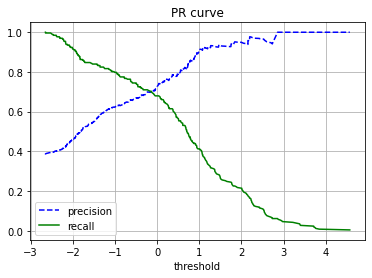

In [49]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
y_logic_scores = cross_val_predict(logic_reg, x_pre, x_labels, cv=5, method='decision_function')  
from sklearn.metrics import precision_recall_curve
precisions_logic, recalls_logic, thresholds_logic = precision_recall_curve(x_labels, y_logic_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.xlabel('threshold')
    plt.legend()
    plt.grid()
    plt.title('PR curve')
    plt.show()
plot_precision_recall_vs_threshold(precisions_logic, recalls_logic, thresholds_logic)

### ROC curve

In [50]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1],[0, 1], 'k--')  
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

In [51]:
x_scores = logic_reg.decision_function(x_pre)

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(x_labels, x_scores)

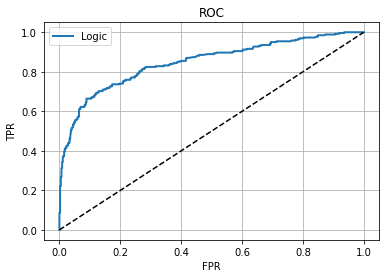

In [53]:
plot_roc_curve(fpr, tpr, 'Logic')

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(x_labels, x_scores)

0.8476759966072944

I think it's ok.

## RandomForest

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
x_probas_forest = cross_val_predict(forest_clf, x_pre, x_labels, cv=5, method='predict_proba')

In [56]:
x_probas_forest

array([[0.65      , 0.35      ],
       [0.93      , 0.07      ],
       [0.82866667, 0.17133333],
       ...,
       [0.93766667, 0.06233333],
       [0.87      , 0.13      ],
       [0.4       , 0.6       ]])

In [57]:
x_scores_forest = x_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold = roc_curve(x_labels, x_scores_forest)

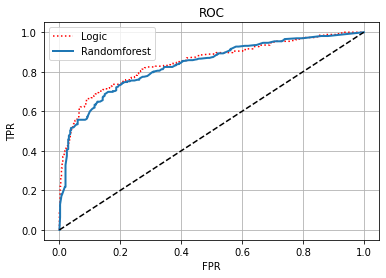

In [58]:
plt.plot(fpr, tpr, 'r:', label='Logic')
plot_roc_curve(fpr_forest, tpr_forest,'Randomforest')

Little difference.

## SGDClassifier

In [59]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)  
sgd_clf.fit(x_pre, x_labels)

SGDClassifier(random_state=42)

In [60]:
x_SDG_predict = sgd_clf.predict(x_pre)

### Confusion matrix

In [61]:
confusion_matrix(x_labels, x_SDG_predict)

array([[331, 119],
       [ 58, 204]], dtype=int64)

### ROC curve

In [62]:
cross_val_score(sgd_clf, x_pre, x_SDG_predict, cv=10) 

array([1.        , 0.98611111, 1.        , 0.97183099, 0.98591549,
       0.98591549, 0.98591549, 1.        , 0.94366197, 0.97183099])

In [63]:
x_sgd_scores = sgd_clf.decision_function(x_pre)
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(x_labels, x_sgd_scores)

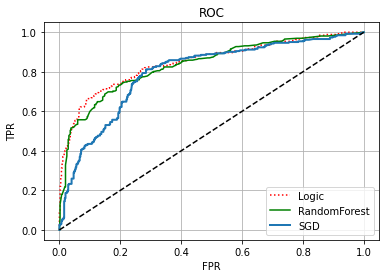

In [64]:
plt.plot(fpr, tpr, 'r:', label='Logic')
plt.plot(fpr_forest, tpr_forest, 'g-', label='RandomForest')
plot_roc_curve(fpr_sgd, tpr_sgd, 'SGD')

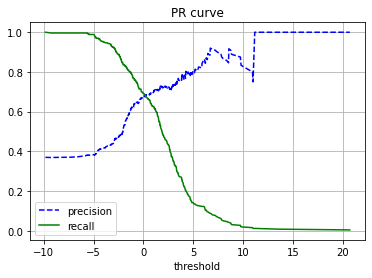

In [65]:
y_SGD_score = cross_val_predict(sgd_clf, x_pre, x_labels, cv=5, method='decision_function')  
precisions_SGD, recalls_SGD, thresholds_SGD = precision_recall_curve(x_labels, y_SGD_score)
plot_precision_recall_vs_threshold(precisions_SGD, recalls_SGD, thresholds_SGD)

## SVM

In [66]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_pre, x_labels)

SVC()

In [75]:
x_svc_predict = svc.predict(x_pre)

### Confusion matrix

In [76]:
confusion_matrix(x_labels, x_svc_predict)

array([[407,  43],
       [ 77, 185]], dtype=int64)

### K-fold cross validation

In [77]:
cross_val_score(svc, x_pre, x_labels, cv=10, scoring='accuracy')  # 10折交叉验证

array([0.79166667, 0.86111111, 0.77464789, 0.81690141, 0.81690141,
       0.78873239, 0.73239437, 0.83098592, 0.8028169 , 0.84507042])

### PR curve

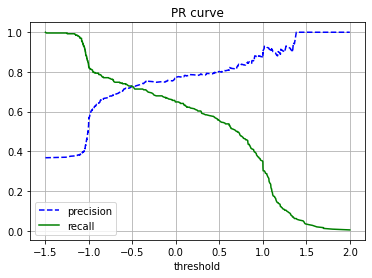

In [79]:
y_svc_scores = cross_val_predict(svc, x_pre, x_labels, cv=5, method='decision_function')
precisions_svc, recalls_svc, thresholds_svc = precision_recall_curve(x_labels, y_svc_scores)
plot_precision_recall_vs_threshold(precisions_svc, recalls_svc, thresholds_svc)

### ROC curve

In [81]:
x_svc_scores = svc.decision_function(x_pre)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(x_labels, x_svc_scores)

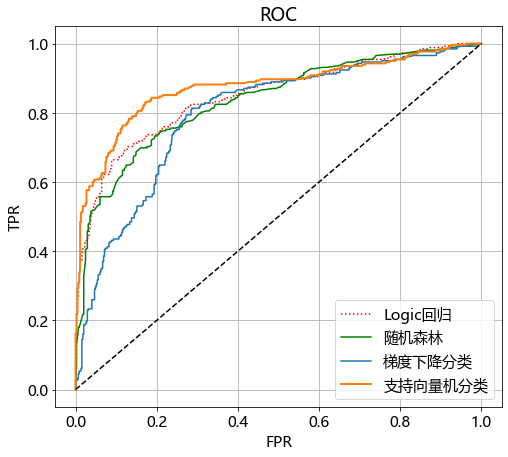

In [97]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure(figsize=[8,7])
plt.rcParams.update({"font.size":15})
plt.plot(fpr, tpr, 'r:', label='Logic回归')
plt.plot(fpr_forest, tpr_forest, 'g-', label='随机森林')
plt.plot(fpr_sgd, tpr_sgd, label='梯度下降分类')
plot_roc_curve(fpr_svc, tpr_svc, '支持向量机分类')

SVC looks good.

# Predict test set

I choose LogisticRegression.

In [69]:
loss_rate(y_pre)

Fare          0.24%
Pclass        0.00%
Cabin_E       0.00%
Embarked_Q    0.00%
Embarked_C    0.00%
Cabin_U       0.00%
Cabin_G       0.00%
Cabin_FG      0.00%
Cabin_FE      0.00%
Cabin_F       0.00%
Cabin_D       0.00%
Age           0.00%
Cabin_C       0.00%
Cabin_B       0.00%
Cabin_A       0.00%
Sex_male      0.00%
Sex_female    0.00%
Parch         0.00%
SibSp         0.00%
Embarked_S    0.00%
dtype: object

Need to fill "Fare", with the use of average.

In [70]:
y_pre['Fare'] = y_pre['Fare'].fillna(y_pre['Fare'].mean())

In [71]:
loss_rate(y_pre)

Pclass        0.00%
Age           0.00%
Embarked_Q    0.00%
Embarked_C    0.00%
Cabin_U       0.00%
Cabin_G       0.00%
Cabin_FG      0.00%
Cabin_FE      0.00%
Cabin_F       0.00%
Cabin_E       0.00%
Cabin_D       0.00%
Cabin_C       0.00%
Cabin_B       0.00%
Cabin_A       0.00%
Sex_male      0.00%
Sex_female    0.00%
Fare          0.00%
Parch         0.00%
SibSp         0.00%
Embarked_S    0.00%
dtype: object

In [85]:
y_predict = svc.predict(y_pre)

In [86]:
submission = pd.DataFrame(np.c_[test_id, y_predict], columns=['PassengerId', 'Survived'])

In [87]:
submission.to_csv(r'E:\kaggle竞赛\泰坦尼克\submission.csv', index = False)